In [1]:
from mqt.yaqs.core.data_structures.networks import MPS, MPO
from mqt.yaqs import simulator
from mqt.yaqs.core.data_structures.simulation_parameters import AnalogSimParams, Observable
from mqt.yaqs.core.libraries.gate_library import X, Z, RuntimeCost
from mqt.yaqs.core.data_structures.noise_model import NoiseModel

import matplotlib.pyplot as plt
import numpy as np
import pickle

In [ ]:
def tdvp_simulator(H_0, noise_model, state=None):
    L = H_0.length
    num_traj = 100
    max_bond_dim = 2**L
    min_bond_dim = 2
    threshold = 1e-6
    sample_timesteps = True
    order = 2

    elapsed_time = 10
    dt = 0.1

    state = MPS(length=L)

    results = {}
    # for j in range(int(elapsed_time / dt)):
    # time = dt

    measurements = [Observable(X(), site) for site in range(L)] + [Observable("runtime_cost")]
    sim_params = AnalogSimParams(measurements, elapsed_time, dt, num_traj, max_bond_dim, min_bond_dim, threshold, order, sample_timesteps=sample_timesteps)

    simulator.run(state, H_0, sim_params, noise_model=noise_model)

    exp_val = sim_params.observables
    results = {'exp_vals': exp_val}
    return results

In [ ]:
L = 16
state = MPS(length=L, state="zeros")
J = 1
h = 1
H_0 = MPO()
H_0.init_ising(L, J, h)

# measurements = [Observable(X(), site) for site in range(L)]

gammas = [0, 1e-3, 1e-1]
totals = []
for j, gamma in enumerate(gammas):
    # Define the noise model
    noise_model = NoiseModel([
        {"name": name, "sites": [i], "strength": gamma} for i in range(L) for name in ["dephasing", "bitflip", "bitphaseflip"]
        ])

    results = tdvp_simulator(H_0, noise_model)
    filename = f"results_gamma_{j}.pickle"
    with open(filename, 'wb') as handle:
        pickle.dump(results, handle)

In [ ]:
filename = "results_gamma_0.pickle"
with open(filename, 'rb') as f:
    results = pickle.load(f)

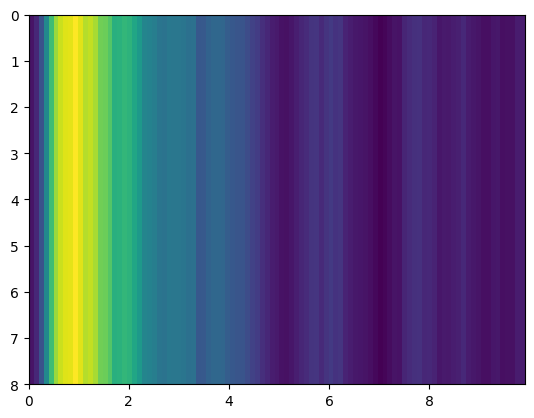

In [ ]:
heatmap = [observable.results for observable in results['exp_vals'][0::-2]]

fig, ax = plt.subplots(1, 1)
im = plt.imshow(heatmap, aspect="auto", extent=(0, 9.9, L, 0))

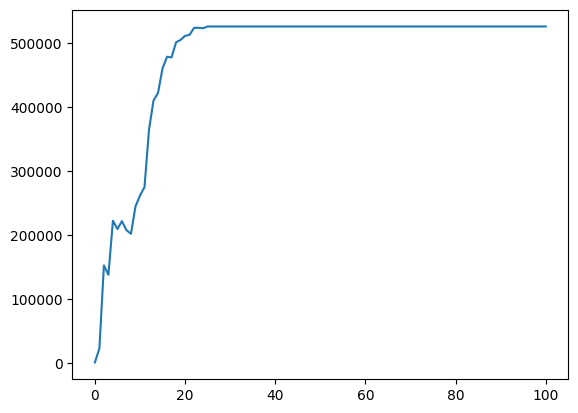

In [ ]:
filename = "results_gamma_0.pickle"
with open(filename, 'rb') as f:
    results = pickle.load(f)
plt.plot(results['exp_vals'][-1].results)

filename = "results_gamma_1.pickle"
with open(filename, 'rb') as f:
    results = pickle.load(f)
plt.plot(results['exp_vals'][-1].results)

filename = "results_gamma_2.pickle"
with open(filename, 'rb') as f:
    results = pickle.load(f)
plt.plot(results['exp_vals'][-1].results)